<a href="https://colab.research.google.com/github/shakya1527/Placement-Prediction/blob/main/Fuzzy_C_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fuzzy-c-means

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: typer
    Found existing installation: typer 0.7.0
    Uninstalling typer-0.7.0:
      Successfully uninstalled typer-0.7.0


In [ ]:
import numpy as np
import pandas as pd
from fcmeans import FCM
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/StudentInfo1.csv')

In [ ]:
df

,Your Name,Roll Number,Email ID,Course,Semester,S.G.P.A,Backlog,Backlog Subject,Score
0,Piyush Khandelia,BCA/40541/20,piyushkhandelia2002@gmail.com,BCA,6,8.70,No,NaN,86
1,Kumari priya,BCA/40018/20,kp6273275@gmail.com,BCA,6,7.91,No,Null,40
2,Raunak kumar,BCA/40545/20,ujjwalmishra916@gmail.com,BCA,6,7.92,No,0,90
3,Komal Kumari,BCA/40016/20,kchoubey905@gmail.com,BCA,6th,8.80,No,NaN,98
4,Swati kumari,BCA/40008/20,kumariswati7321@gmail.com,BCA,6th,6.08,No,Clear,64
...,...,...,...,...,...,...,...,...,...
84,Ankur Aayush,BCA/40517/20,bca40517.20@bitmesra.ac.in,BCA,6th,7.63,No,Null,32
85,Aman kumar,BCA/40522/20,bca40522.20@bitmesra.ac.in,BCA,6th,8.10,No,Null,62
86,Kumar Anshuman,BCA/40516/20,bca40516.20@bitmesra.ac.in,BCA,6th,8.64,No,Null,52
87,Sanjeev Kumar Sharma,BCA/40566/20,bca40566.20@bitmesra.ac.in,BCA,6th,7.83,No,Null,40


In [ ]:
x = df[['S.G.P.A','Score']]
x

,S.G.P.A,Score
0,8.70,86
1,7.91,40
2,7.92,90
3,8.80,98
4,6.08,64
...,...,...
84,7.63,32
85,8.10,62
86,8.64,52
87,7.83,40


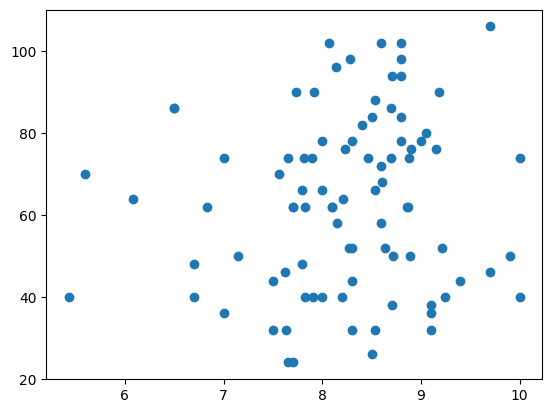

In [ ]:
plt.scatter(df['S.G.P.A'],df['Score'])

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scale = StandardScaler()
scaledx = scale.fit_transform(x)
scaledx[:5]

array([[ 0.53057274,  1.08048825],
       [-0.36168896, -1.09216347],
       [-0.35039451,  1.26941449],
       [ 0.64351726,  1.64726696],
       [-2.42857366,  0.04139395]])

In [ ]:
new_data = pd.DataFrame(scaledx, columns = ['Scaled S.G.P.A','Scaled IQ Score'])
print(new_data)

    Scaled S.G.P.A  Scaled IQ Score
0         0.530573         1.080488
1        -0.361689        -1.092163
2        -0.350395         1.269414
3         0.643517         1.647267
4        -2.428574         0.041394
..             ...              ...
84       -0.677934        -1.470016
85       -0.147094        -0.053069
86        0.462806        -0.525385
87       -0.452045        -1.092163
88       -0.452045        -0.053069

[89 rows x 2 columns]


In [ ]:
y = new_data.iloc[:,:].values
fcm = FCM (n_clusters=4)
fcm.fit(y)
labels = fcm.predict(y)

In [ ]:
centroids = fcm.centers

In [ ]:
centroids

array([[-0.84704349, -1.03106969],
       [-0.4918086 ,  0.24216745],
       [ 0.87739588, -0.86653222],
       [ 0.50198   ,  1.07722052]])

In [ ]:
labels

array([3, 0, 3, 3, 0, 3, 3, 0, 1, 3, 3, 3, 3, 1, 3, 3, 2, 1, 1, 3, 3, 3,
       0, 2, 1, 3, 3, 2, 1, 3, 2, 3, 2, 1, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2,
       1, 3, 3, 3, 3, 2, 1, 3, 1, 2, 1, 2, 0, 1, 1, 3, 0, 0, 3, 0, 2, 1,
       0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 1, 3, 1, 0, 1, 2, 0,
       1])

Text(0.5, 1.0, 'Fuzzy C-means Clustering')

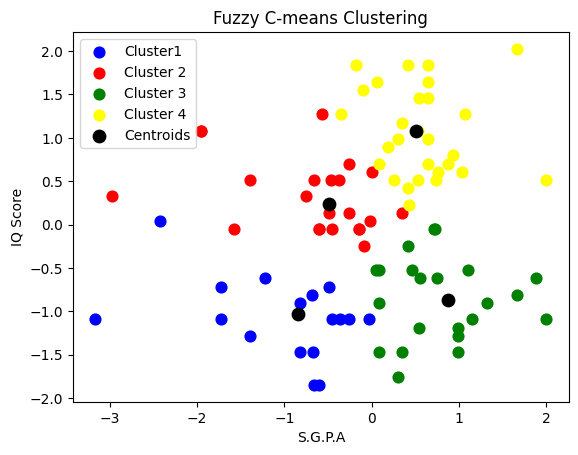

In [ ]:
plt.scatter(y[labels == 0,0],y[labels == 0,1],color='blue', s=60, label = 'Cluster1')
plt.scatter(y[labels == 1,0],y[labels == 1,1],color='red', s=60, label='Cluster 2')
plt.scatter(y[labels == 2,0],y[labels == 2,1],color='green', s=60, label='Cluster 3')
plt.scatter(y[labels == 3,0],y[labels == 3,1],color='yellow', s=60, label='Cluster 4')
plt.scatter(centroids[:, 0], centroids[:, 1], s = 80, color = 'black', label = 'Centroids')
plt.legend()
plt.xlabel('S.G.P.A')
plt.ylabel('IQ Score')
plt.title("Fuzzy C-means Clustering")

In [ ]:
#Calculate Silhoutte Score

from sklearn.metrics import silhouette_score
score = silhouette_score(new_data, labels, metric='euclidean')
print('Silhouette Score of Fuzzy C-means: %.3f' % score)

Silhouette Score of Fuzzy C-means: 0.362
